# ライブラリのインポート

In [ ]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# データの読み込みと表示

In [ ]:
df = pd.read_csv("boston.csv")
df.head()

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


# 説明変数(X)と目的変数(Y)の選択

In [ ]:
y_name = "PRICE"
y = df[y_name].values
x_table = df.drop([y_name],axis=1)
x_name = x_table.columns
x = x_table.values

# 訓練データとテストデータを分ける(正確にやるなら検証用データも作る)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.3)

# モデルの宣言と学習

In [ ]:
model = LR()
model.fit(x_train, y_train)

LinearRegression()

# テストデータによる予測

In [ ]:
y_pred = model.predict(x_test)

# 各精度指標

In [ ]:
print("R2-score=%.2f"%(r2_score(y_test, y_pred)))
print("MAE-score=%.2f"%(mean_absolute_error(y_test, y_pred)))
print("MSE-score=%.2f"%(mean_squared_error(y_test, y_pred)))
print("RMSE-score=%.2f"%(np.sqrt(mean_squared_error(y_test, y_pred))))

R2-score=0.78
MAE-score=3.34
MSE-score=19.83
RMSE-score=4.45


# 正解データと予測データの相関係数

In [ ]:
print(np.corrcoef([y_test, y_pred])[0][1])

0.8916344209910858


# 正解データと予測データの散布図
画像として出力することでどういった間違いをしているか視覚化できる

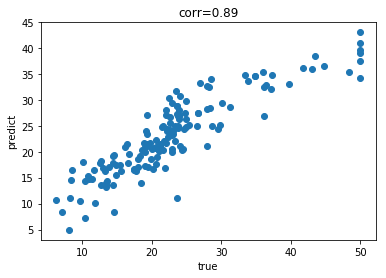

In [ ]:
plt.scatter(y_test, y_pred)
plt.title("corr=%.2f"%(np.corrcoef([y_test, y_pred])[0][1]))
plt.xlabel("true")
plt.ylabel("predict")
plt.show()